`It’s helpful to think of the different categorical plot kinds as belonging to three different families, which we’ll discuss in detail below. They are:`
- Categorical scatterplots
    - stripplot() (with kind="strip"; the default)
    - swarmplot() (with kind="swarm")
- Categorical distribution plots
    - boxplot() (with kind="box")
    - violinplot() (with kind="violin")
    - boxenplot() (with kind="boxen")
- Categorical estimate plots
    - pointplot() (with kind="point")
    - barplot() (with kind="bar")
    - countplot() (with kind="count")

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

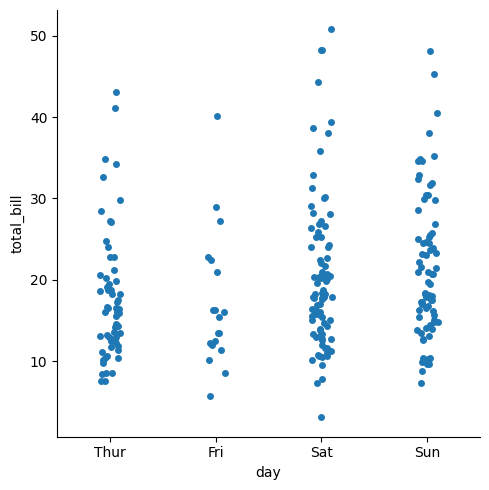

In [77]:
tips = sns.load_dataset("tips")
sns.catplot(data=tips, x="day", y="total_bill")

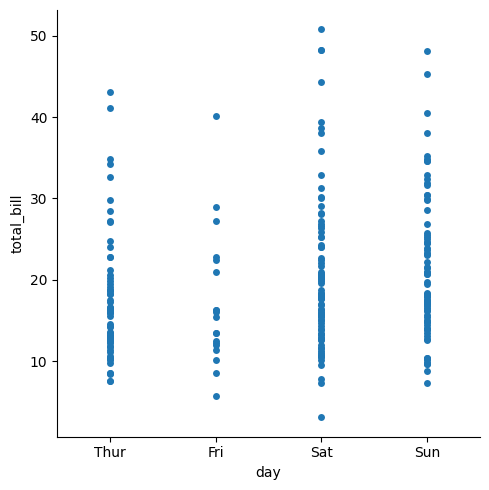

In [78]:
sns.catplot(data=tips, x="day", y="total_bill", jitter=False)
# sns.scatterplot(data=tips, x="day", y="total_bill", )

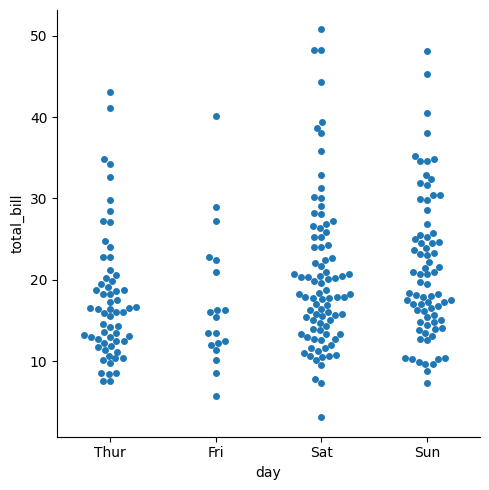

In [79]:
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm")

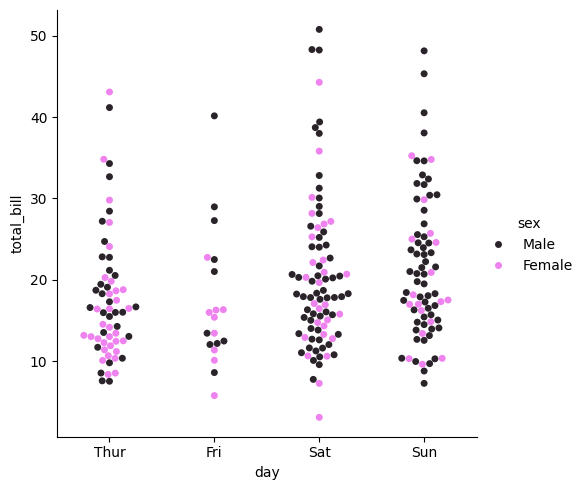

In [80]:
sns.catplot(data=tips, x="day", y="total_bill", 
            hue="sex", kind="swarm", palette='dark:violet')

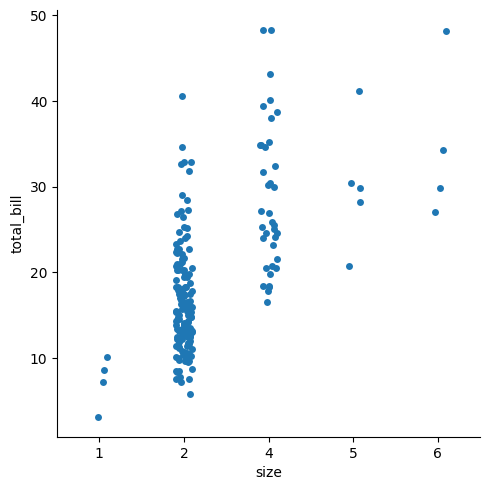

In [81]:
sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill")

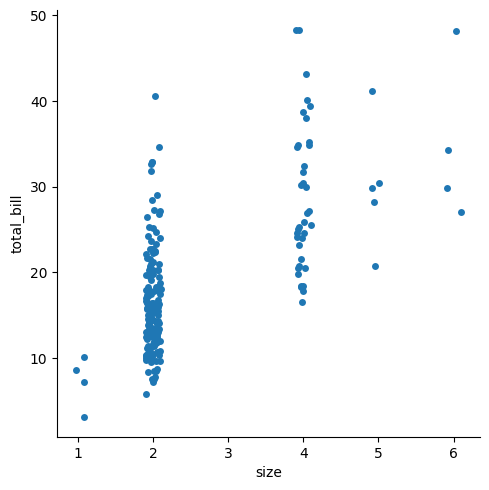

In [82]:
sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill", 
            native_scale=True)

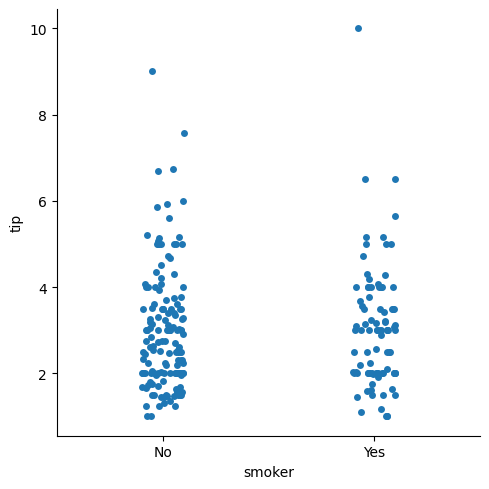

In [83]:
sns.catplot(data=tips, x="smoker", y="tip", 
            order=["No", "Yes"])

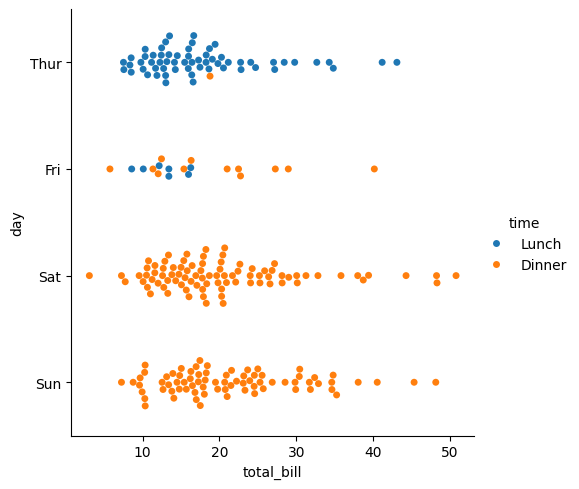

In [84]:
sns.catplot(data=tips, x="total_bill", y="day", hue="time", kind="swarm")

### Comparing distributions

### Boxplots


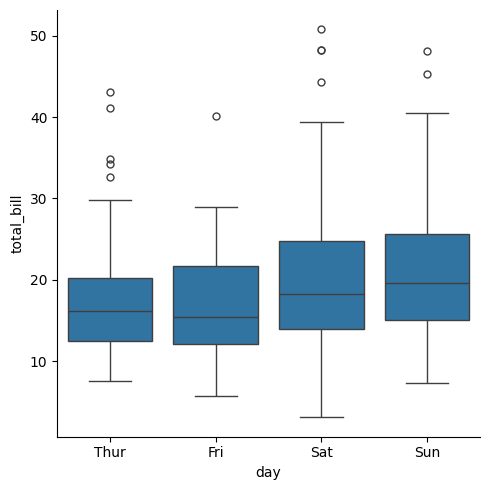

In [85]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

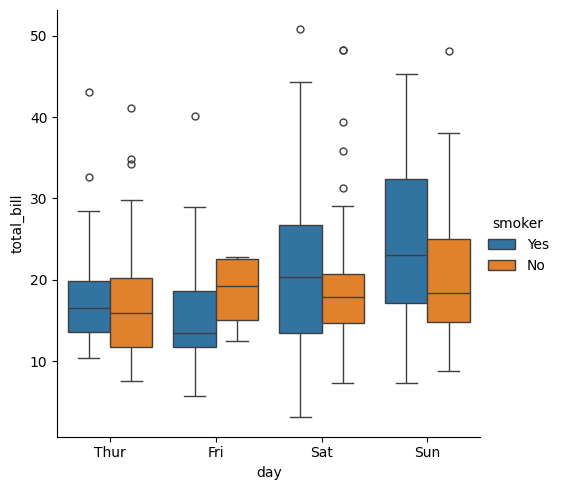

In [86]:
sns.catplot(data=tips, x="day", y="total_bill", 
            hue="smoker", kind="box")

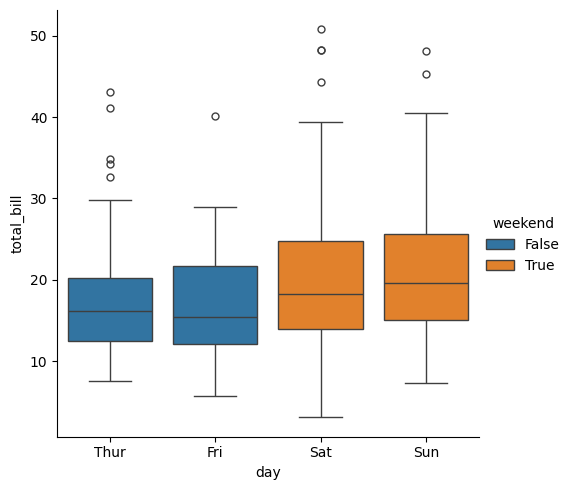

In [87]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(data=tips, x="day", y="total_bill", 
            hue="weekend", kind="box")

In [88]:
diamonds = pd.read_csv("D:\seaborn-dataset\seaborn-data-master\diamonds.csv")

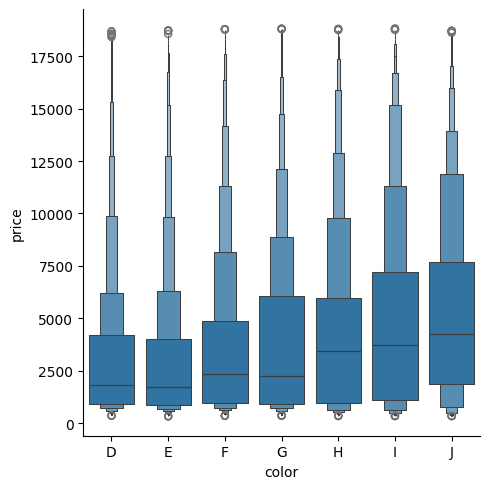

In [89]:
sns.catplot(
    data=diamonds.sort_values("color"),
    x="color", y="price", kind="boxen",
)

### Violinplots

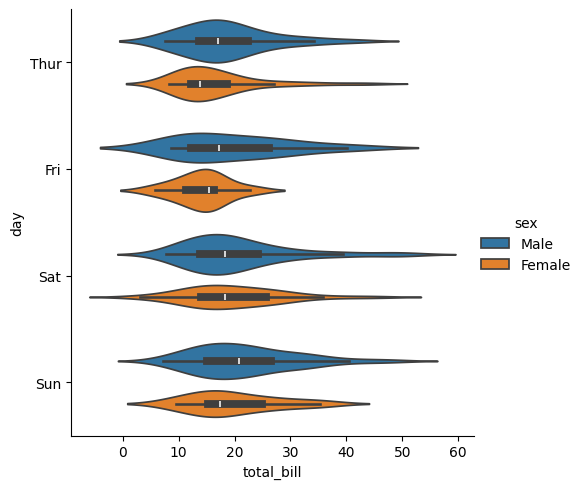

In [90]:
sns.catplot(data=tips, x="total_bill", y="day", 
            hue="sex", kind="violin",)

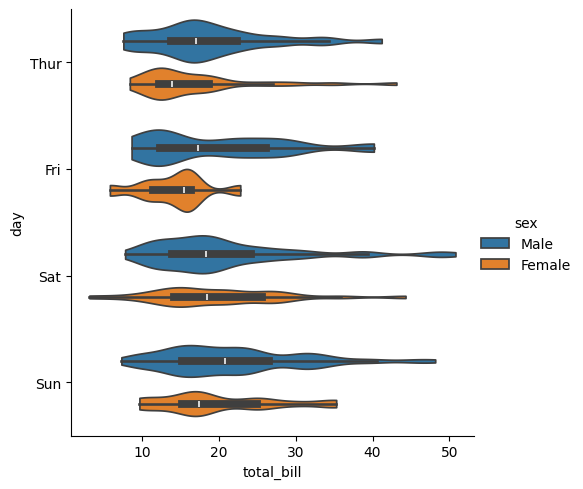

In [91]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex",
    kind="violin", bw_adjust=.5, cut=0,
)

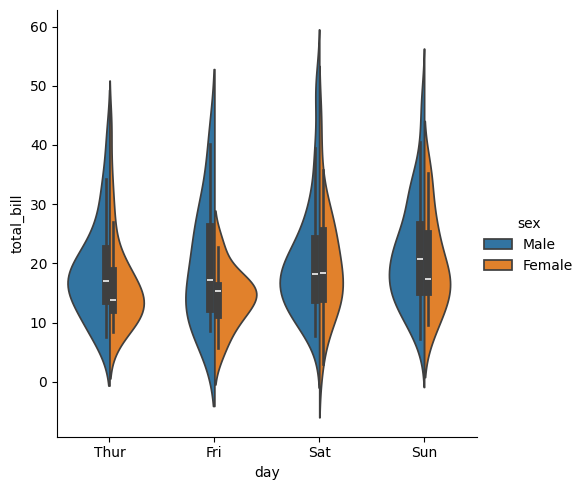

In [92]:
# sns.catplot(
#     data=tips, y="day", x="total_bill", hue="sex",
#     kind="violin", split=True,
# )
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", split=True,
)

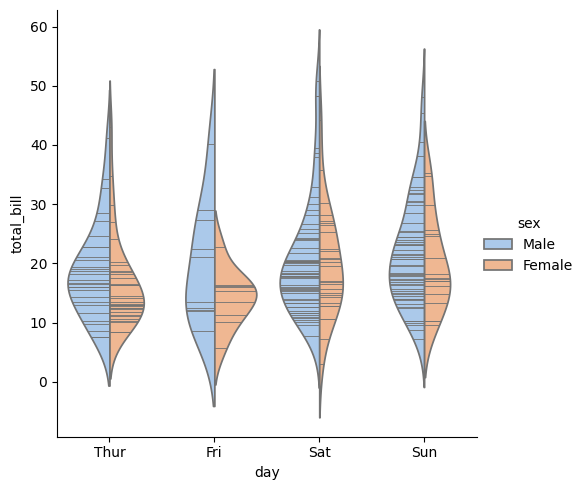

In [93]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", inner="stick", split=True, palette="pastel",
)

<Axes: xlabel='day', ylabel='total_bill'>

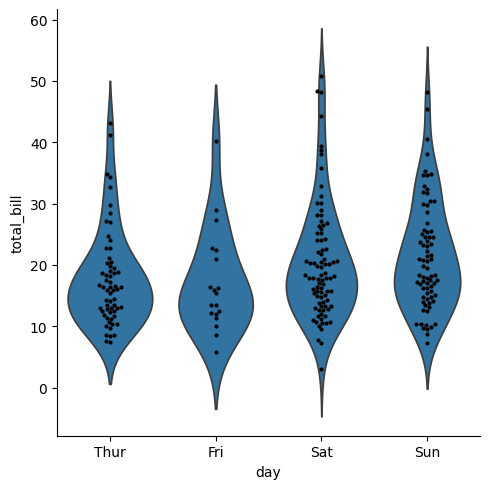

In [94]:
g = sns.catplot(data=tips, x="day", y="total_bill", 
                kind="violin", inner=None)
sns.swarmplot(data=tips, x="day", y="total_bill", 
              color="k", size=3, ax=g.ax)

### Estimating central tendency


### Bar plots

In [97]:
titanic = pd.read_csv("D:\seaborn-dataset\seaborn-data-master\\titanic.csv")

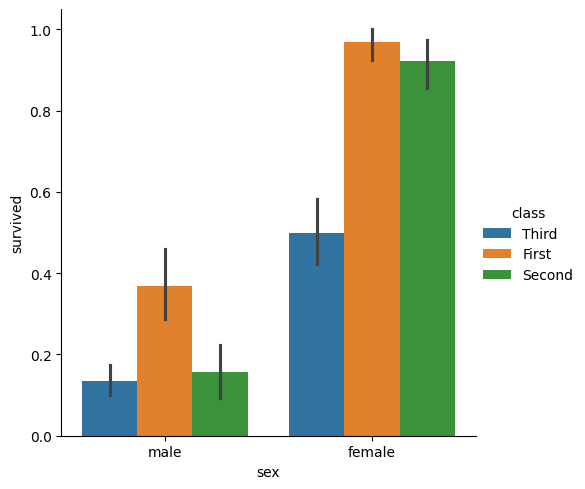

In [98]:
sns.catplot(data=titanic, x="sex", y="survived", 
            hue="class", kind="bar")

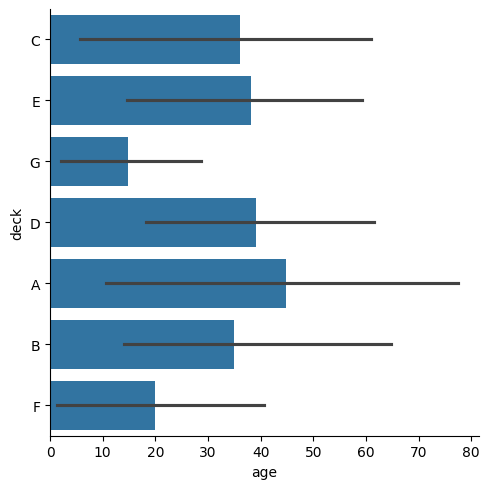

In [106]:
sns.catplot(data=titanic, x="age", y="deck", 
            errorbar=("pi", 95), kind="bar")

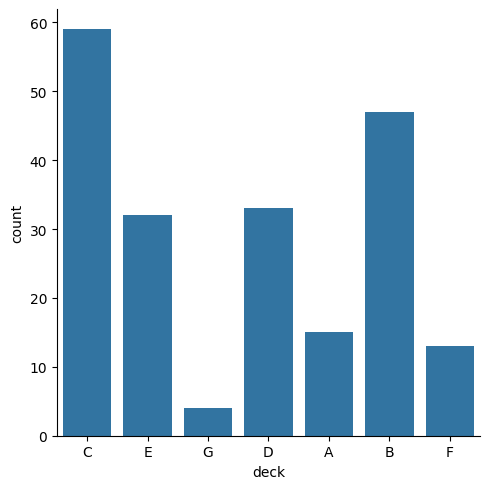

In [107]:
sns.catplot(data=titanic, x="deck", kind="count")

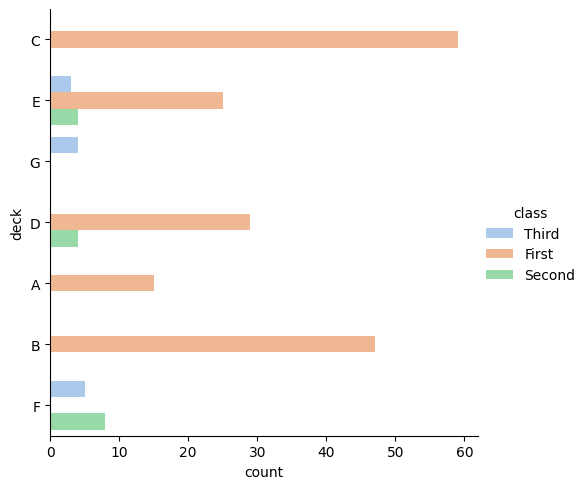

In [110]:
sns.catplot(
    data=titanic, y="deck", hue="class", kind="count",
    palette="pastel", edgecolor=".6",
)

### Point plots

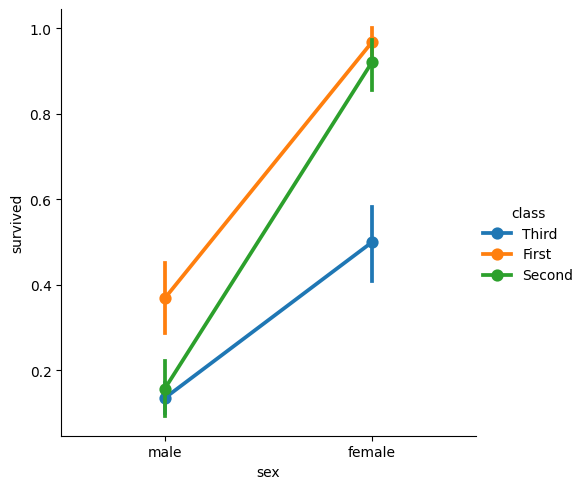

In [111]:
sns.catplot(data=titanic, x="sex", y="survived", 
            hue="class", kind="point")

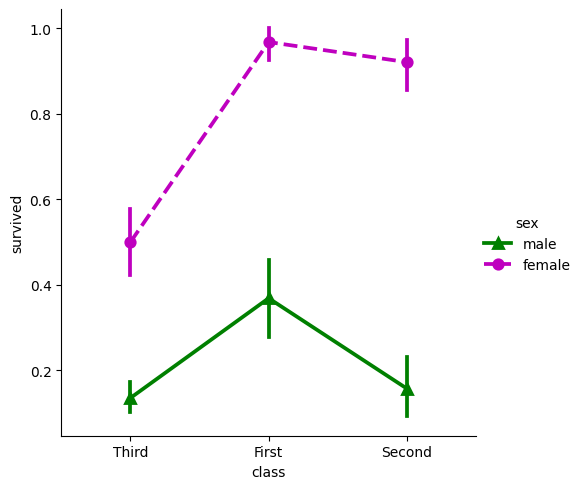

In [112]:
sns.catplot(
    data=titanic, x="class", y="survived", hue="sex",
    palette={"male": "g", "female": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

### Showing additional diamensions

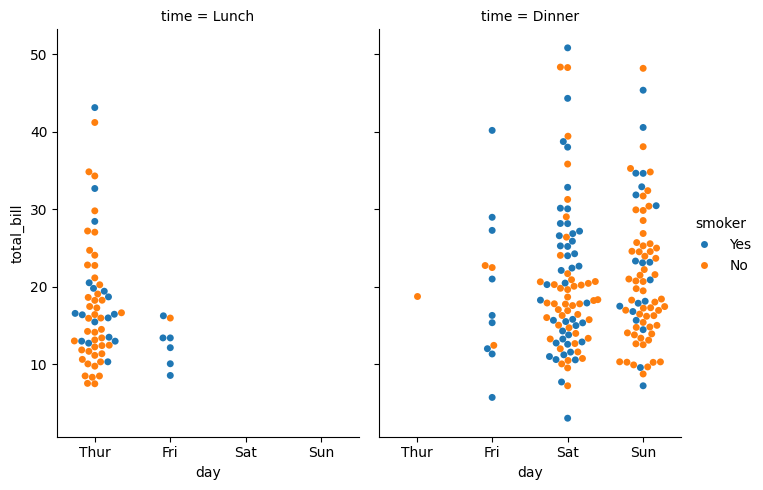

In [113]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="smoker",
    kind="swarm", col="time", aspect=.7,
)

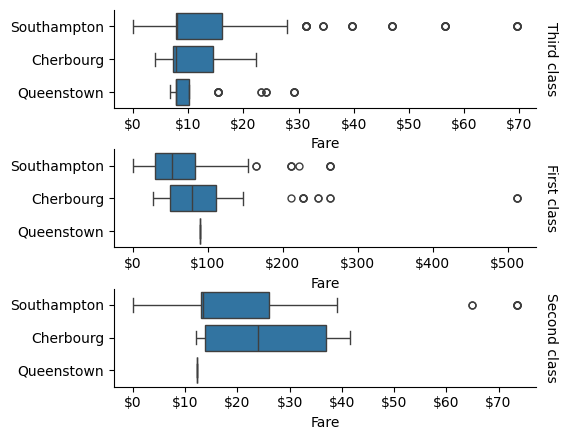

In [117]:
g = sns.catplot(
    data=titanic,
    x="fare", y="embark_town", row="class",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Fare", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')